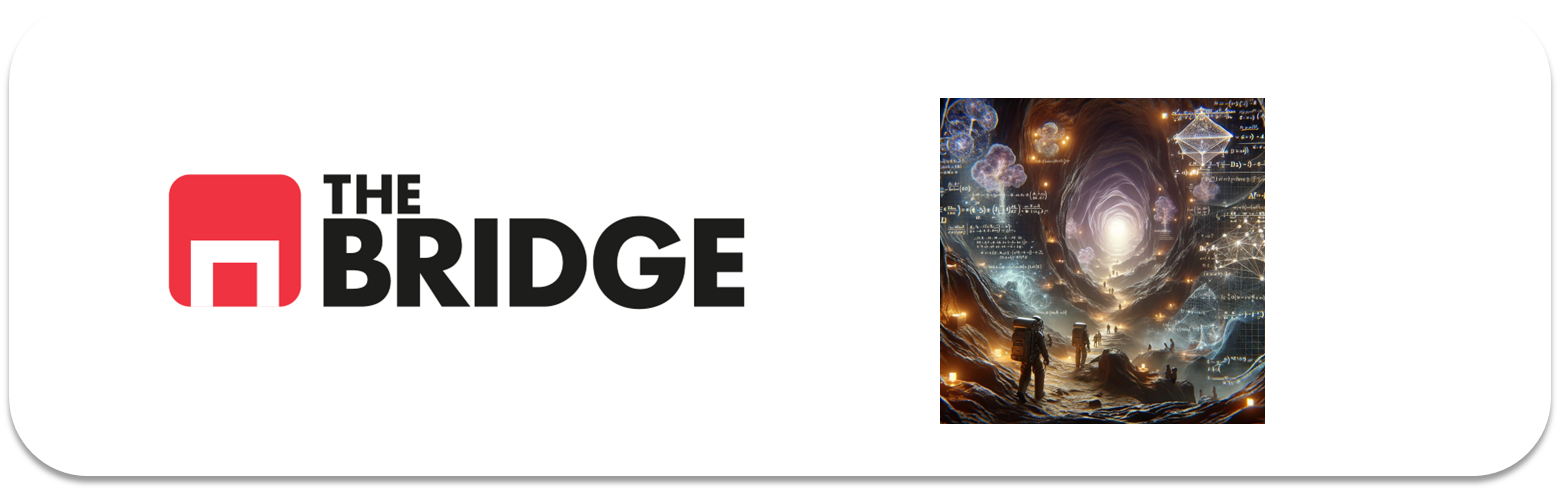

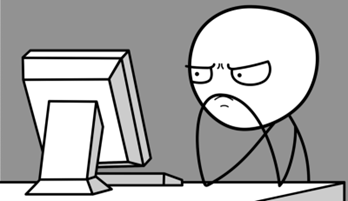

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


``` 


In [3]:
# Ejercicio 1: Cargar los datos
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=',', skipinitialspace=True)

### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [12]:
# Ejercicio 2: Limpieza inicial
# Verificar el DataFrame antes de la limpieza
print("Datos originales:")
print(data.head())
print(data.info())

# Comprobar cuántos valores nulos hay en cada columna
print("Valores nulos por columna:")
print(data.isnull().sum())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Verificar el DataFrame después de la limpieza
print("Datos después de eliminar nulos:")
print(data.info())

# Convertir columnas numéricas a tipo adecuado
data['Horsepower'] = data['Horsepower'].astype(float)

# Identificar características categóricas
categorical_features = ['Origin']

Datos originales:
Empty DataFrame
Columns: [MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           0 non-null      object 
 1   Cylinders     0 non-null      float64
 2   Displacement  0 non-null      float64
 3   Horsepower    0 non-null      float64
 4   Weight        0 non-null      float64
 5   Acceleration  0 non-null      float64
 6   Model Year    0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 0.0+ bytes
None
Valores nulos por columna:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
dtype: int64
Datos después de eliminar nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  --

In [13]:
# Importar bibliotecas necesarias
import pandas as pd

# Ejercicio 1: Cargar los datos
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Cargar los datos
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=',', skipinitialspace=True)

# Verificar el DataFrame después de la carga
print("Datos cargados:")
print(data.head())
print(data.info())

# Ejercicio 2: Limpieza inicial
# Comprobar cuántos valores nulos hay en cada columna
print("Valores nulos por columna:")
print(data.isnull().sum())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Verificar el DataFrame después de la limpieza
print("Datos después de eliminar nulos:")
print(data.info())

# Convertir columnas numéricas a tipo adecuado
data['Horsepower'] = data['Horsepower'].astype(float)

# Identificar características categóricas
categorical_features = ['Origin']

Datos cargados:
                                                 MPG  Cylinders  Displacement  \
0  18.0   8   307.0      130.0      3504.      12...        NaN           NaN   
1  15.0   8   350.0      165.0      3693.      11...        NaN           NaN   
2  18.0   8   318.0      150.0      3436.      11...        NaN           NaN   
3  16.0   8   304.0      150.0      3433.      12...        NaN           NaN   
4  17.0   8   302.0      140.0      3449.      10...        NaN           NaN   

   Horsepower  Weight  Acceleration  Model Year  Origin  
0         NaN     NaN           NaN         NaN     NaN  
1         NaN     NaN           NaN         NaN     NaN  
2         NaN     NaN           NaN         NaN     NaN  
3         NaN     NaN           NaN         NaN     NaN  
4         NaN     NaN           NaN         NaN     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
--

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [14]:
# Asegúrate de que el DataFrame se ha cargado correctamente
# Verificar el DataFrame después de la carga
print("Datos cargados:")
print(data.head())
print(data.info())

# Ejercicio 3: Convertir 'Origin' a valores literales y hacer one-hot encoding
# Verificar los valores únicos en la columna 'Origin'
if 'Origin' in data.columns:
    print("Valores únicos en 'Origin' antes de la conversión:")
    print(data['Origin'].unique())
else:
    raise KeyError("La columna 'Origin' no se encuentra en el DataFrame.")

# Convertir 'Origin' a valores literales
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Verificar el DataFrame después de la conversión
print("Datos después de convertir 'Origin':")
print(data[['Origin']].head())

# Hacer one-hot encoding de la columna 'Origin'
data = pd.get_dummies(data, columns=['Origin'], drop_first=True)

# Verificar el DataFrame después de la codificación
print("Datos después de one-hot encoding:")
print(data.head())
# Verificar el DataFrame después de la codificación
print("Datos después de one-hot encoding:")
print(data.head())

Datos cargados:
Empty DataFrame
Columns: [MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           0 non-null      object 
 1   Cylinders     0 non-null      float64
 2   Displacement  0 non-null      float64
 3   Horsepower    0 non-null      float64
 4   Weight        0 non-null      float64
 5   Acceleration  0 non-null      float64
 6   Model Year    0 non-null      float64
 7   Origin        0 non-null      float64
dtypes: float64(7), object(1)
memory usage: 0.0+ bytes
None
Valores únicos en 'Origin' antes de la conversión:
[]
Datos después de convertir 'Origin':
Empty DataFrame
Columns: [Origin]
Index: []
Datos después de one-hot encoding:
Empty DataFrame
Columns: [MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year]
Index: []
Datos

### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [19]:
# Importar bibliotecas necesarias
import pandas as pd

# Ejercicio 1: Cargar los datos
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Cargar los datos con el separador correcto
data = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=r'\s+', skipinitialspace=True)

# Verificar el DataFrame después de la carga
print("Datos cargados:")
print(data.head())
print(data.info())

# Ejercicio 2: Limpieza inicial
# Comprobar cuántos valores nulos hay en cada columna
print("Valores nulos por columna:")
print(data.isnull().sum())

# Eliminar filas con valores nulos
data.dropna(inplace=True)

# Verificar el DataFrame después de la limpieza
print("Datos después de eliminar nulos:")
print(data.info())

# Convertir columnas numéricas a tipo adecuado
data['Horsepower'] = data['Horsepower'].astype(float)

# Identificar características categóricas
categorical_features = ['Origin']

# Ejercicio 3: Convertir 'Origin' a valores literales y hacer one-hot encoding
if 'Origin' in data.columns:
    data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
    data = pd.get_dummies(data, columns=['Origin'], drop_first=True)

# Verificar el DataFrame después de la codificación
print("Datos después de one-hot encoding:")
print(data.head())

# Ejercicio 4: Dividir los datos en train y test
target = 'MPG'  # Definir la variable objetivo

# Verificar que la columna objetivo existe en el DataFrame
if target not in data.columns:
    raise ValueError(f"La columna '{target}' no se encuentra en el DataFrame.")

# Definir las características (X) y el objetivo (y)
X = data.drop(target, axis=1)  # Características
y = data[target]  # Objetivo

# Verificar que X y y no estén vacíos
if X.empty or y.empty:
    raise ValueError("Las características (X) o el objetivo (y) están vacíos.")

# Asegurarse de que y sea numérico
y = pd.to_numeric(y, errors='coerce')

# Verificar que y no tenga valores nulos después de la conversión
if y.isnull().any():
    raise ValueError("La variable objetivo (y) contiene valores nulos después de la conversión.")

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# Opcional: Mostrar las primeras filas de los conjuntos de entrenamiento y prueba
print("\nPrimeras filas del conjunto de entrenamiento (X_train):")
print(X_train.head())
print("\nPrimeras filas del conjunto de prueba (X_test):")
print(X_test.head())

Datos cargados:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
18.0    8      307.0         130.0      3504.0    12.0            70   
15.0    8      350.0         165.0      3693.0    11.5            70   
18.0    8      318.0         150.0      3436.0    11.0            70   
16.0    8      304.0         150.0      3433.0    12.0            70   
17.0    8      302.0         140.0      3449.0    10.5            70   

      Model Year                     Origin  
18.0           1  chevrolet chevelle malibu  
15.0           1          buick skylark 320  
18.0           1         plymouth satellite  
16.0           1              amc rebel sst  
17.0           1                ford torino  
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64


### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

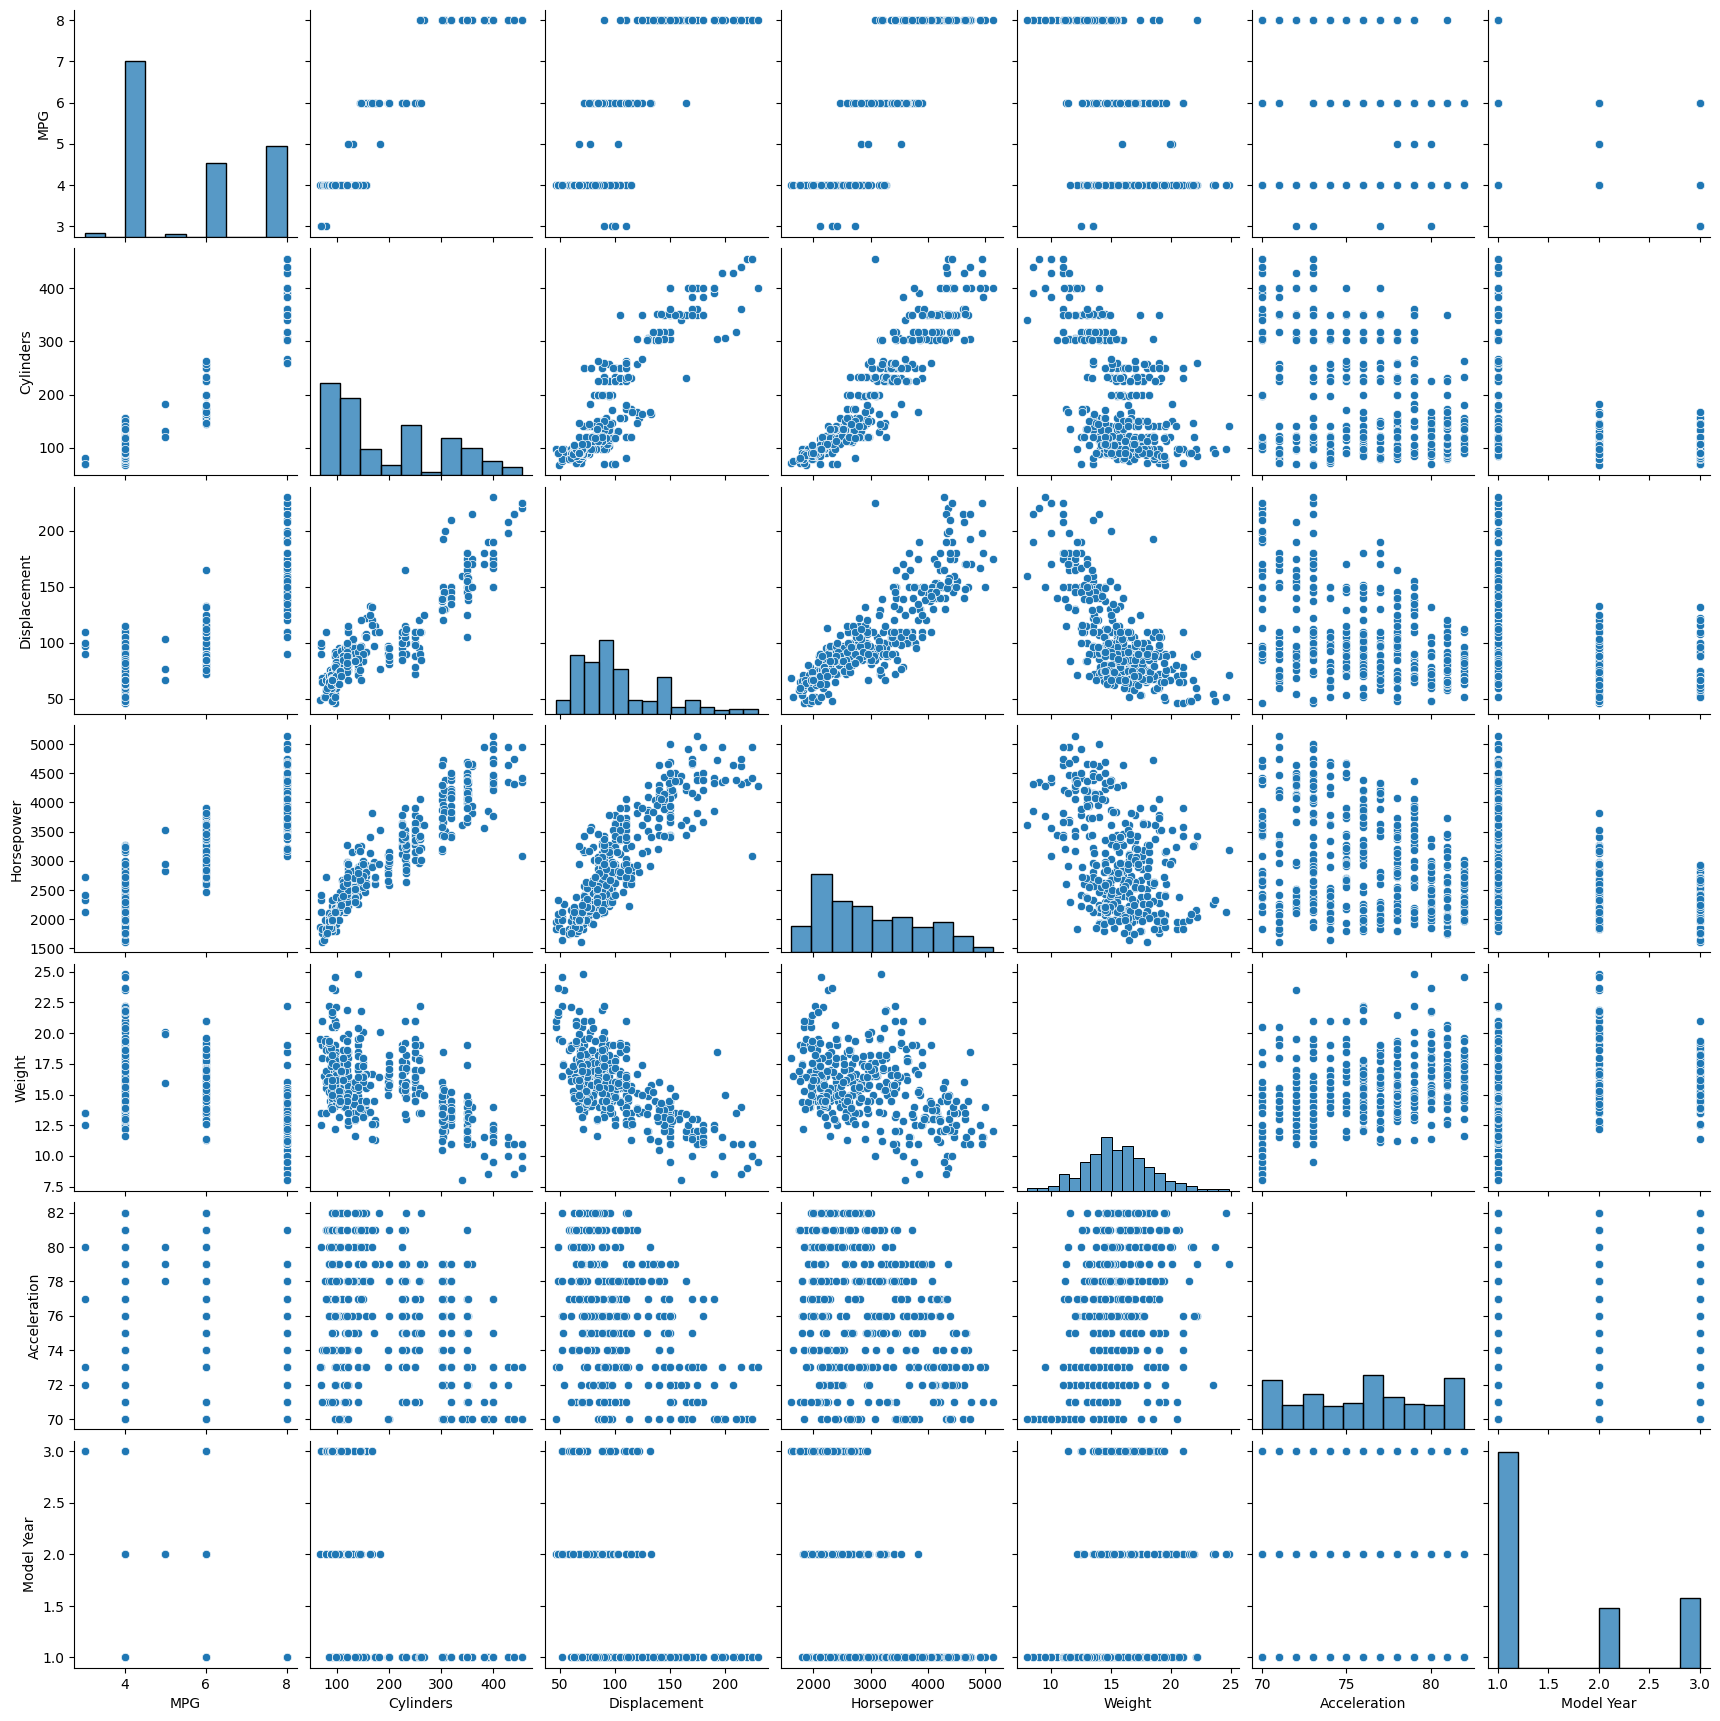

In [20]:
# Ejercicio 5: Inspeccionar los datos
sns.pairplot(data)
plt.show()

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [21]:
# Ejercicio 6: Estandarizar train y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [22]:
# Ejercicio 7: Construir el modelo con Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [23]:
# Ejercicio 8: Inspeccionar el modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [24]:
# Ejercicio 9: Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=1000, 
                    validation_split=0.2, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 28.9599 - mae: 5.1245 - mse: 28.9599 - val_loss: 17.6793 - val_mae: 3.9381 - val_mse: 17.6793
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.5027 - mae: 4.0481 - mse: 18.5027 - val_loss: 11.0893 - val_mae: 3.0114 - val_mse: 11.0893
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9469 - mae: 3.0123 - mse: 10.9469 - val_loss: 6.3453 - val_mae: 2.0904 - val_mse: 6.3453
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.1409 - mae: 2.0621 - mse: 6.1409 - val_loss: 3.8449 - val_mae: 1.4209 - val_mse: 3.8449
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.5070 - mae: 1.7018 - mse: 4.5070 - val_loss: 2.9842 - val_mae: 1.2507 - val_mse: 2.9842
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.2156 - mae: 1.3769 - mse: 3.2156 - val_loss: 2.4406 - val_mae: 1.2069 - val_mse: 2.4406
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.4056 - mae: 1.2166 - mse: 2.4056 - 

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

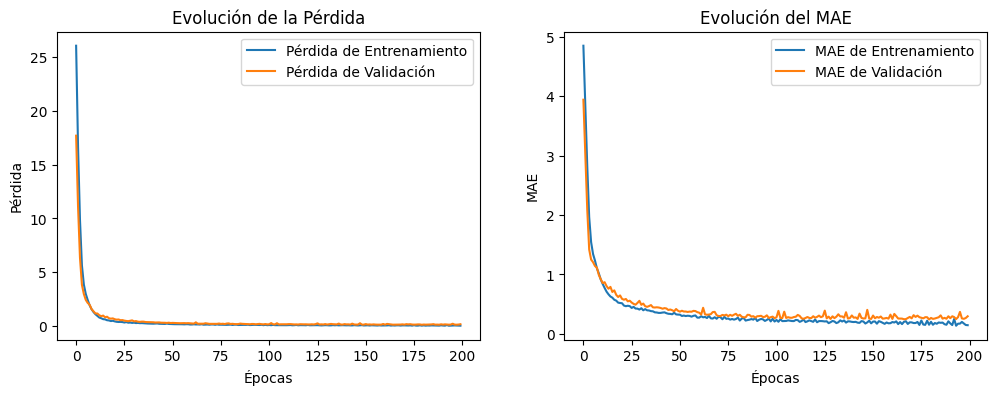

In [25]:
# Ejercicio 10: Visualizar el progreso de entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Evolución de la Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='MAE de Entrenamiento')
    plt.plot(history.history['val_mae'], label='MAE de Validación')
    plt.title('Evolución del MAE')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_training_history(history)

### Ejercicio 11

Comenta las gráficas anteriores.

Análisis de la primera gráfica (Evolución de la Pérdida):

La pérdida comienza con un valor alto y disminuye rápidamente en las primeras épocas.
Después de cierto punto, la pérdida se estabiliza, lo que indica que el modelo ha convergido.
La pérdida de validación sigue de cerca la de entrenamiento, lo que sugiere que no hay sobreajuste significativo.
Análisis de la segunda gráfica (Evolución del MAE):

El MAE sigue un comportamiento similar a la pérdida, disminuyendo drásticamente al inicio y luego estabilizándose.
La cercanía entre las curvas de entrenamiento y validación indica un buen ajuste del modelo.
El MAE final es bajo, lo que sugiere que el modelo hace buenas predicciones en términos absolutos.
Conclusión: Las gráficas indican que el modelo ha aprendido correctamente, con un buen equilibrio entre entrenamiento y validación. No hay signos evidentes de sobreajuste ni subajuste, lo que es una señal de un entrenamiento exitoso.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 28.3400 - mae: 4.9849 - mse: 28.3400 - val_loss: 17.2170 - val_mae: 3.7677 - val_mse: 17.2170
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.8000 - mae: 3.8349 - mse: 17.8000 - val_loss: 11.6745 - val_mae: 2.9901 - val_mse: 11.6745
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.4683 - mae: 3.1317 - mse: 12.4683 - val_loss: 7.5408 - val_mae: 2.2530 - val_mse: 7.5408
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8195 - mae: 2.1460 - mse: 6.8195 - val_loss: 4.6148 - val_mae: 1.6813 - val_mse: 4.6148
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.4188 - mae: 1.7069 - mse: 4.4188 - val_loss: 3.2193 - val_mae: 1.3766 - val_mse: 3.2193
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.1002 - mae: 1.3922 - mse: 3.1002 - val_loss: 2.4619 - val_mae: 1.2115 - val_mse: 2.4619
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.5285 - mae: 1.2775 - mse: 2.5285 -

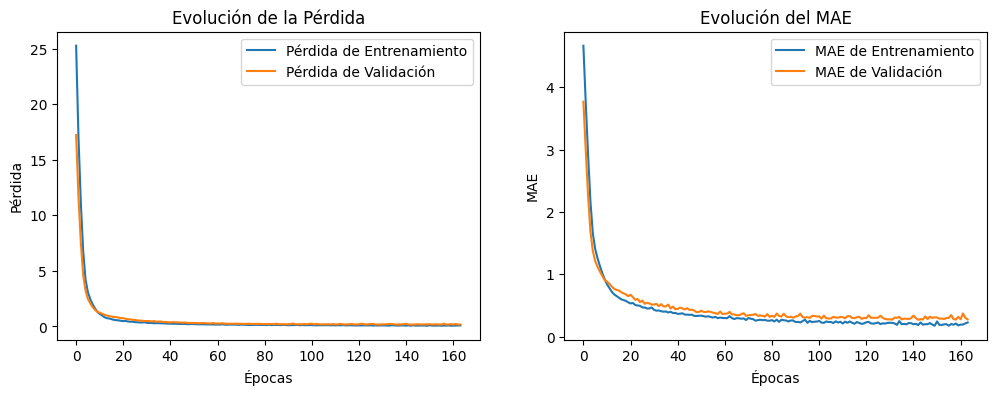

In [27]:
# Importar bibliotecas necesarias
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Ejercicio 12: Añadir un callback y volver a entrenar
# Definir el modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Entrenar el modelo con EarlyStopping
history_with_early = model.fit(X_train_scaled, y_train, epochs=1000, 
                                validation_split=0.2, 
                                callbacks=[early_stopping])

# Visualizar el progreso de entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Evolución de la Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='MAE de Entrenamiento')
    plt.plot(history.history['val_mae'], label='MAE de Validación')
    plt.title('Evolución del MAE')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

# Llamar a la función para graficar el historial de entrenamiento
plot_training_history(history_with_early)

Interpreta el gráfico

1. Evolución de la Pérdida (Gráfico Izquierdo)
La pérdida disminuye rápidamente en las primeras épocas y luego se estabiliza, lo que indica que el modelo está aprendiendo adecuadamente.
La pérdida de entrenamiento y la de validación siguen trayectorias similares, lo que sugiere que no hay un sobreajuste significativo.
Al final del entrenamiento, la pérdida es baja, lo que indica que el modelo ha logrado un buen ajuste a los datos.
2. Evolución del MAE (Gráfico Derecho)
El MAE también disminuye drásticamente al inicio y luego se estabiliza en un valor bajo, lo que indica que el modelo mejora su precisión con el tiempo.
La diferencia entre el MAE de entrenamiento y el de validación es pequeña, lo que sugiere que el modelo generaliza bien a datos no vistos.
Las pequeñas fluctuaciones en el MAE de validación pueden deberse a la variabilidad en los datos de validación.
Conclusión
El modelo muestra un buen aprendizaje, sin señales evidentes de sobreajuste o subajuste. La pérdida y el MAE alcanzan valores bajos y estables, lo que indica que el modelo ha logrado un buen nivel de generalización.









### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [28]:
# Ejercicio 13: Evaluar el modelo en el conjunto de test
# Asegúrate de que los datos de prueba estén normalizados
X_test_scaled = scaler.transform(X_test)

# Evaluar el modelo
loss, mae, mse = model.evaluate(X_test_scaled, y_test)

# Imprimir los resultados
print(f'Loss: {loss:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1391 - mae: 0.2593 - mse: 0.1391
Loss: 0.1664, MAE: 0.2687, MSE: 0.1664


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


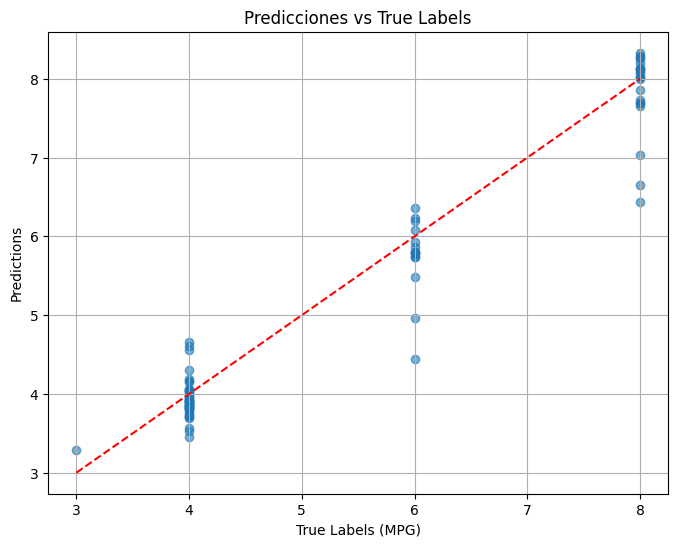

In [29]:
import matplotlib.pyplot as plt

# Ejercicio 14: Predicciones y scatter plot
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('True Labels (MPG)')
plt.ylabel('Predictions')
plt.title('Predicciones vs True Labels')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.grid()
plt.show()